In [1]:
# Bag of Words(BoW) : 단어의 등장 순서를 고려하지 않는 빈도수 기반의 텍스트 데이터의 수치화 방법
# 가방에 단어들을 넣으면 순서가 중요하지 않음
# 각 단어에 고유한 인덱스를 부여하고
# 각 인덱스의 위치에 단어의 출현 횟수를 저장
from konlpy.tag import Okt
import re
okt=Okt()
token=re.sub("[.!#~]","",'비가 오니 마음이 차분해지네요. 요즘 너무 더웠어요. 비가 오니 마음이 기쁘네요.')
#형태소 분석
token=okt.morphs(token)
word2index={} #단어 사전(단어와 숫자 인덱스)
bow=[] #단어 가방(단어와 출현 횟수)
for voca in token:
    #사전에 없는 단어 추가
    if voca not in word2index.keys():
        word2index[voca]=len(word2index)
        #단어의 인덱스와 출현횟수(기본값:1)
        bow.insert(len(word2index)-1,1)
    else:
        #재등장하는 단어의 인덱스
        index=word2index.get(voca)
        #단어 카운트 증가
        bow[index]=bow[index]+1
print(word2index)

{'비': 0, '가': 1, '오니': 2, '마음': 3, '이': 4, '차분해지네요': 5, '요즘': 6, '너무': 7, '더웠어요': 8, '기쁘네요': 9}


In [2]:
#단어의 출현 횟수
print(bow)

[2, 2, 2, 2, 2, 1, 1, 1, 1, 1]


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
#문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터를 만드는 클래스
corpus=['모처럼 전국에 비가 내리고 있습니다.']
line=['전국에 비가']
vector = CountVectorizer()
vector.fit(corpus)
print(vector.vocabulary_)
print(vector.transform(line).toarray()) #단어 위치에 1 표시

{'모처럼': 1, '전국에': 4, '비가': 2, '내리고': 0, '있습니다': 3}
[[0 0 1 0 1]]


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['''모처럼 전국에 비가 내리고 있습니다.
대부분 밤까지 계속되기 때문에 종일 우산이 필요하겠는데요.
비의 양도 많고 바람도 강하게 불기 때문에 작은 우산 말고 큰 우산 챙기는 게 더 좋습니다. ''']
#문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터를 만드는 클래스
vector = CountVectorizer()
# 코퍼스로부터 각 단어의 빈도수 계산
#단어들의 출현 횟수
print(vector.fit_transform(corpus).toarray())
# 만들어진 단어와 인덱스
print(vector.vocabulary_)

[[1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1]]
{'모처럼': 7, '전국에': 18, '비가': 11, '내리고': 2, '있습니다': 16, '대부분': 3, '밤까지': 9, '계속되기': 1, '때문에': 4, '종일': 19, '우산이': 15, '필요하겠는데요': 22, '비의': 12, '양도': 13, '많고': 5, '바람도': 8, '강하게': 0, '불기': 10, '작은': 17, '우산': 14, '말고': 6, '챙기는': 21, '좋습니다': 20}


In [5]:
#공백 단위로 나누어지므로 한국어의 경우 정확도가 떨어짐(비슷한 단어들도 별도로 집계됨)
f=open('c:/data/text/news1.txt')
corpus=f.read()
txt=okt.nouns(corpus)
txt2=[' '.join(txt)]
txt2

['어린이 라면 한화 이글스 팬 를 광속 인류 김서현 유니폼 팬서비스 한화 이글스 랜더스 주말 연전 그 자체 두 경기 승 양 팀 일요일 경기 연장 접전 끝 최원호 감독 새 사령탑 한화 위 승 무 패 기록 꼴찌 승차 경기 승부 치의 양보 장면 토요일 저녁 경기 야구 팬 자녀 데리 야구장 한화 유니폼 어린이 관중석 여기저기 주말 나들이 만끽 외야 워닝 트랙 왼쪽 오른쪽 끝 왕복 달리 러닝 훈련 소화 한화 김서현 발견 팬 응원 함성 때 선수 보통 훈련 계속 집중 거나 손 번 정도 훈련 후 더그아웃 팬 유니폼 공 사인 게 일반 모습 김서현 조금 달리기 후 숨 김서현 관중석 팬 이야기 모습 처음 사이 것 팬 선수 선수 팬 점 팬 이야기 추억 선사 김서현 모습 게다가 김서현 선물 선사 팬 이야기 후 바퀴 더 달리 온 김서현 유니폼 꼬마 팬 향 야구공 쓱린 향 손 인사 한화 유니폼 유니폼 어린이 팬 대하 김서현 태도 얼마 전 야구 커뮤니티 경기 김서현 대전 화생 이글스 파크 충무 체육관 사이 도로 어린이 팬 동안 캐치 볼 모습 화제 김서현 팬 사인 요청 응 시간 가장 것 팬서비스 선수 칭찬 야구장 안과 밖 초심 김서현 태도 팬 무조건 사랑 보답']

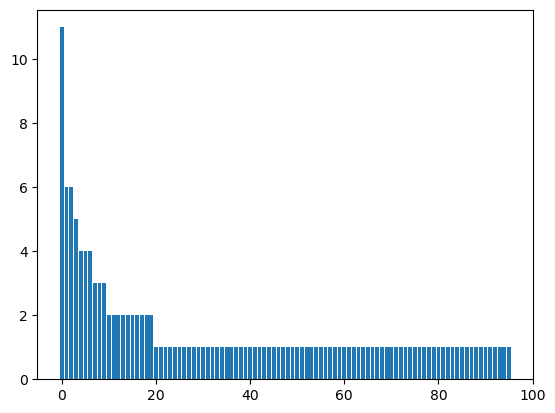

[('김서현', 11), ('한화', 6), ('유니폼', 6), ('경기', 5), ('모습', 4), ('어린이', 4), ('선수', 4), ('훈련', 3), ('이야기', 3), ('이글스', 3), ('사이', 2), ('사인', 2), ('주말', 2), ('선사', 2), ('야구', 2), ('달리', 2), ('태도', 2), ('야구장', 2), ('관중석', 2), ('팬서비스', 2), ('응원', 1), ('인류', 1), ('인사', 1), ('일반', 1), ('워닝', 1), ('일요일', 1), ('요청', 1), ('왼쪽', 1), ('자녀', 1), ('자체', 1), ('조금', 1), ('저녁', 1), ('화생', 1), ('함성', 1), ('파크', 1), ('트랙', 1), ('토요일', 1), ('커뮤니티', 1), ('캐치', 1), ('칭찬', 1), ('치의', 1), ('충무', 1), ('추억', 1), ('최원호', 1), ('초심', 1), ('체육관', 1), ('처음', 1), ('집중', 1), ('외야', 1), ('정도', 1), ('접전', 1), ('장면', 1), ('왕복', 1), ('가장', 1), ('연전', 1), ('라면', 1), ('동안', 1), ('도로', 1), ('데리', 1), ('더그아웃', 1), ('대하', 1), ('대전', 1), ('달리기', 1), ('나들이', 1), ('꼴찌', 1), ('꼬마', 1), ('기록', 1), ('광속', 1), ('계속', 1), ('게다가', 1), ('거나', 1), ('감독', 1), ('랜더스', 1), ('러닝', 1), ('만끽', 1), ('무조건', 1), ('연장', 1), ('여기저기', 1), ('얼마', 1), ('화제', 1), ('야구공', 1), ('안과', 1), ('쓱린', 1), ('시간', 1), ('오른쪽', 1), ('승차', 1), ('소화', 1), ('선물', 1), ('사령

In [6]:
import numpy as np
import matplotlib.pyplot as plt
vect = CountVectorizer().fit(txt2)
#bow의 출현횟수 합계
cnt = vect.transform(txt2).toarray().sum(axis=0)
idx = np.argsort(-cnt) #카운트 내림차순 정렬
cnt = cnt[idx]
# x축의 단어이름
feature_name = np.array(vect.get_feature_names_out())[idx]
plt.bar(range(len(cnt)), cnt)
plt.show()
print(list(zip(feature_name,cnt)))

In [7]:
#불용어 추가
vector = CountVectorizer(stop_words=['더'])
print(vector.fit_transform(txt2).toarray())
print(vector.vocabulary_)

[[ 1  1  1  1  5  1  2  1  1 11  1  1  1  2  1  1  1  1  1  1  1  1  1  1
   1  4  1  1  1  1  1  1  1  2  2  1  2  4  1  1  1  1  1  1  2  1  2  1
   4  1  1  1  1  1  1  1  1  1  1  6  1  3  3  1  1  1  1  1  1  1  1  1
   1  1  2  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1  2  6  1  1  1  3]]
{'어린이': 48, '라면': 21, '한화': 91, '이글스': 61, '광속': 7, '인류': 63, '김서현': 9, '유니폼': 59, '팬서비스': 90, '랜더스': 22, '주말': 74, '연전': 52, '자체': 68, '경기': 4, '일요일': 66, '연장': 51, '접전': 71, '최원호': 79, '감독': 1, '사령탑': 32, '기록': 8, '꼴찌': 11, '승차': 40, '승부': 39, '치의': 82, '양보': 47, '장면': 69, '토요일': 87, '저녁': 70, '야구': 44, '자녀': 67, '데리': 18, '야구장': 46, '관중석': 6, '여기저기': 50, '나들이': 12, '만끽': 24, '외야': 55, '워닝': 58, '트랙': 88, '왼쪽': 56, '오른쪽': 53, '왕복': 54, '달리': 13, '러닝': 23, '훈련': 95, '소화': 38, '발견': 28, '응원': 60, '함성': 92, '선수': 37, '보통': 30, '계속': 5, '집중': 75, '거나': 2, '정도': 72, '더그아웃': 17, '사인': 34, '일반': 65, '모습': 25, '조금': 73, '달리기': 14, '이야기': 62, '처음': 76, '사이': 33, '추억': 80, '선사': 36, '게다가': 3, '선물': 35